In [47]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from datetime import datetime
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
date = []
nombres = []
precios = []

In [33]:
base_url = 'https://www.eneba.com/es/store/games?page='

max_page = 5

for i in tqdm(range(1, max_page)):
    
    url = base_url+str(i)

    request = requests.get(url)
    doc = BeautifulSoup(request.text, 'html.parser')
    
    juegos_tag = doc.find_all(class_='pFaGHa WpvaUk')

    for juego in juegos_tag:
        
        now = datetime.now()
        current_time = now.strftime('%d/%m/%y %H:%M:%S')
        
        nombre = juego.find('span', class_='YLosEL').text
        
        precios_tag = juego.find_all('span', class_='L5ErLT')
        if len(precios_tag) >= 2:
            precio = precios_tag[1].text.replace('\xa0€', '').replace(',','.')
            float(precio)
        elif len(precios_tag) == 1:
            precio = precios_tag[0].text.replace('\xa0€', '').replace(',','.')
            float(precio)
        else:
            precio = ""
        
        nombres.append(nombre)
        precios.append(precio)
        date.append(current_time)
    

100%|██████████| 4/4 [00:15<00:00,  3.99s/it]


In [34]:
juegos = {'Nombre':nombres, 'Precio' : precios, 'Fecha' : date}

In [42]:
df = pd.DataFrame(juegos)
df['Precio'] = df['Precio'].astype(float)
df.drop_duplicates(inplace=True)
df.head()

,Nombre,Precio,Fecha
0,Sea of Thieves Deluxe Edition PC/XBOX LIVE Key...,11.00,11/06/23 15:01:12
1,GhostWire: Tokyo (PC) Código de Steam GLOBAL,7.15,11/06/23 15:01:12
2,Diablo® IV XBOX LIVE Key EUROPE,68.90,11/06/23 15:01:12
3,Wall World (PC) Steam Key GLOBAL,1.68,11/06/23 15:01:12
4,Midnight Ghost Hunt (PC) Steam Key GLOBAL,1.01,11/06/23 15:01:12


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 0 to 79
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Nombre  80 non-null     object 
 1   Precio  80 non-null     float64
 2   Fecha   80 non-null     object 
dtypes: float64(1), object(2)
memory usage: 2.5+ KB


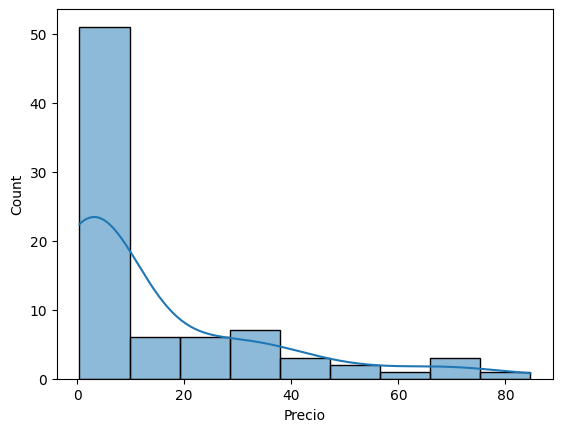

In [48]:
sns.histplot(df.Precio, kde=True)
plt.show()

In [36]:
df.to_csv('Listado.csv', sep=';', mode='a', index=False, header=False, encoding='utf-8')